# 小麦粘连分割

PS:使用距离变换和找轮廓实现粘连分割

### 一.导入相关的包

In [1]:
%matplotlib inline
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

### 二.加载图片

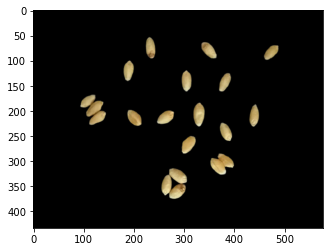

In [2]:
img=cv2.imread("rice.jpg")
img2= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

### 三.灰度处理

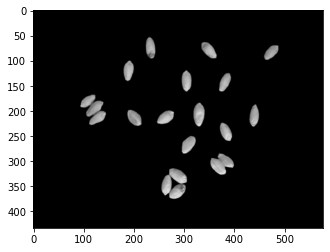

In [3]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

### 四.二值化

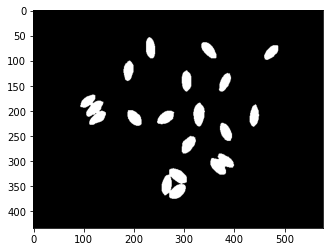

In [4]:
# ret,th1=cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
ret,th1=cv2.threshold(gray,70,255,cv2.THRESH_BINARY)
img2 = cv2.cvtColor(th1,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

### 五.1腐蚀变换

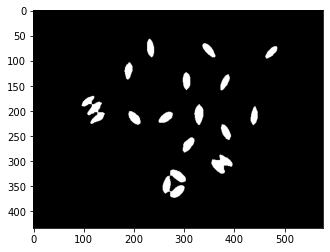

In [7]:
# kernel=np.ones((6,6),np.uint8)
kernel=np.ones((5,5),np.uint8)
# kernel=np.ones((5,5),np.uint8)
erosion = cv2.erode(th1,kernel,iterations = 1)#腐蚀
img2= cv2.cvtColor(erosion,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

### 五.2膨胀变换

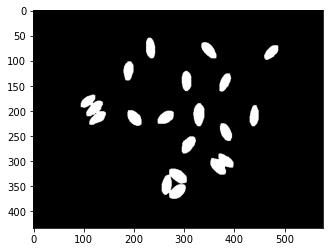

In [8]:
# kernel = np.ones((3,3),np.uint8) 
erosion= cv2.dilate(erosion,kernel,iterations = 1)
img2= cv2.cvtColor(erosion,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

### 六.距离变换

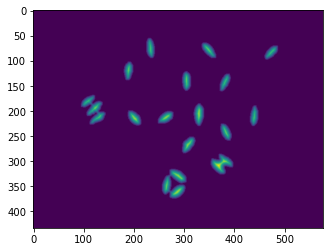

In [9]:

dist_img = cv2.distanceTransform(erosion, cv2.DIST_L2, cv2.DIST_MASK_5)#距离变换
# plt.imshow(dist_img)
# plt.show()

dist_output = cv2.normalize(dist_img, 0, 1.0, cv2.NORM_MINMAX)#归一化

plt.imshow(dist_output*80)
plt.show()
# cv2.imshow('dist_output',dist_output*80)

### 七.二值化+开运算

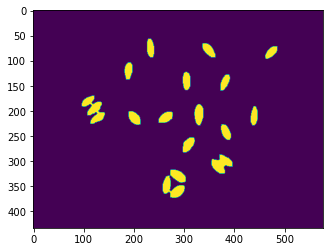

In [10]:
ret,th2=cv2.threshold(dist_output*80,0.3,255,cv2.THRESH_BINARY)
plt.imshow(th2*80)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)
plt.show()

### 八.找轮廓

In [11]:
opening = np.array(opening,np.uint8)
contours, hierarchy = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)#轮廓提取

In [12]:
for contour in contours:
    print(cv2.contourArea(contour))

907.0
512.0
885.5
456.0
396.5
424.0
435.0
377.5
545.0
1112.5
359.5
415.5
387.5
343.0
418.0
394.0


### 九.绘制轮廓

In [320]:
# cv2.drawContours(img,contours,-1,(0,0,255),3)
# img2= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# plt.imshow(img2)
# plt.show()

### 十.分割图像

In [13]:
count = 0    # 米粒个数
margin = 3   # 裁剪边距
for i, contour in enumerate(contours):
    ares = cv2.contourArea(contour)  # 计算包围形状的面积
    if ares < 15:  # 过滤面积小于15的形状
        continue
    count += 1
    rect = cv2.minAreaRect(contour)   # 检测轮廓最小外接矩形，得到最小外接矩形的（中心(x,y), (宽,高), 旋转角度）
    box = np.int0(cv2.boxPoints(rect))   # 获取最小外接矩形的4个顶点坐标
  #  cv2.drawContours(image, [box], 0, (255, 0, 0), 2)     # 绘制轮廓最小外接矩形
 
    h, w = img.shape[:2]      # 原图像的长和宽
    rect_w, rect_h = int(rect[1][0]) + 1, int(rect[1][1]) + 1      # 最小外接矩形的宽和高
    if rect_w <= rect_h:
        x, y = box[1][0], box[1][1]            # 旋转中心
        M2 = cv2.getRotationMatrix2D((x, y), rect[2], 1)
        rotated_image = cv2.warpAffine(img, M2, (w * 2, h * 2))
        rotated_canvas = rotated_image[y - margin:y + rect_h + margin + 1, x - margin:x + rect_w + margin + 1]
    else:
        x, y = box[2][0], box[2][1]         # 旋转中心
        M2 = cv2.getRotationMatrix2D((x, y), rect[2] + 90, 1)
        rotated_image = cv2.warpAffine(img, M2, (w * 2, h * 2))
        rotated_canvas = rotated_image[y - margin:y + rect_w + margin + 1, x - margin:x + rect_h + margin + 1]
    print("rice #{}".format(count))
 #   cv2.imshow("rotated_canvas", rotated_canvas)
    cv2.imwrite("{}.jpg".format(count), rotated_canvas)

rice #1
rice #2
rice #3
rice #4
rice #5
rice #6
rice #7
rice #8
rice #9
rice #10
rice #11
rice #12
rice #13
rice #14
rice #15
rice #16
